In [ ]:
1. 3개의 데이터를 병합하시오

====이후문제는 병합한 데이터프레임을 이용 ===========

2. 년도, 월별로 인덱스를 설정(멀티인덱스) 하고 데이터를 보여 주시오

3. 년도 및 월별 평균 사망자를 보여주시오

4. 2016년 사고대비 사망율을 구하시오

5. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시오

6. 2015년 대비  사망이 가장 많이 증가한 2016년도 월을 구하시오

# 해설

In [2]:
import pandas as pd
import numpy as np

In [3]:
data1 = pd.read_csv('2014.csv', encoding='cp949')
data2 = pd.read_csv('2015.csv', encoding='cp949')
data3 = pd.read_csv('2016.csv', encoding='cp949')

In [4]:
# 3개의 데이터를 병합하시오.
data = pd.concat([data1, data2, data3])
data.set_index('구분', inplace=True)
data.head()

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474


In [5]:
# 년도, 월별로 인덱스를 설정(멀티인덱스) 하고 데이터를 보여 주시오
data_index = pd.to_datetime(data.index, format='%Y년%m월')

data.set_index([data_index.year, data_index.month], inplace=True)
data.head()

사고(건)  사망(명)  부상(명)
구분   구분                     
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.index.names = ['년도', '월']

In [8]:
data

사고(건)  사망(명)  부상(명)
년도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

In [9]:
# 년도 및 월별 평균 사망자를 보여주시오
data.groupby('년도')[['사망(명)']].mean()

,사망(명)
년도,
2014,10.833333
2015,9.000000
2016,8.166667


In [10]:
data.groupby('월')[['사망(명)']].mean()

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


In [11]:
# 2016년 사고대비 사망율을 구하시오
data_acc = data.loc[2016]['사고(건)'].sum()
data_d = data.loc[2016]['사망(명)'].sum()

data_d / data_acc

0.04027949034114262

<AxesSubplot:xlabel='월'>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anacond

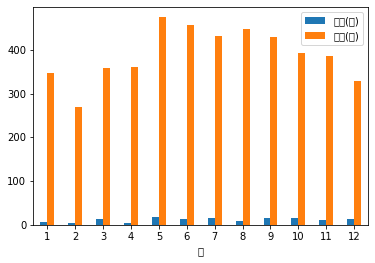

In [12]:
# 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시오
data.loc[2014][['사망(명)','부상(명)']].plot(kind='bar', rot=1)

In [14]:
# 2015년 대비  사망이 가장 많이 증가한 2016년도 월을 구하시오
(data.loc[2016]['사망(명)'] - data.loc[2015]['사망(명)']).nlargest(1, keep='all')

월
5    4
6    4
Name: 사망(명), dtype: int64